Name: Quejado,  Jimlord M.<br>
Course and Section:  CPE019-CPE32S3 <br>
Date of Submission: February 21, 2024<br>
Instructor: Engr. Roman Richard<br>

# PART 1 Laboratory:


###Part 1: Import the Libraries and Data

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data set
test = '/content/titanic_test.csv'
train = "/content/titanic_train.csv"

testFrame = pd.read_csv(test)
trainFrame = pd.read_csv(train)

### Part 2: Plot the Data

I used bar plots to visualize the data comprehensively, excluding age, as they offer a clearer visualization. Bar plots present information distinctly, allowing for a more straightforward interpretation of the dataset. On the other hand, the violin plot, I found out that it is effective in displaying distributions related to age, because if I used bar plots, it tends to compress visual representations when multiple factors are considered, leading to potential confusion and diminished clarity.

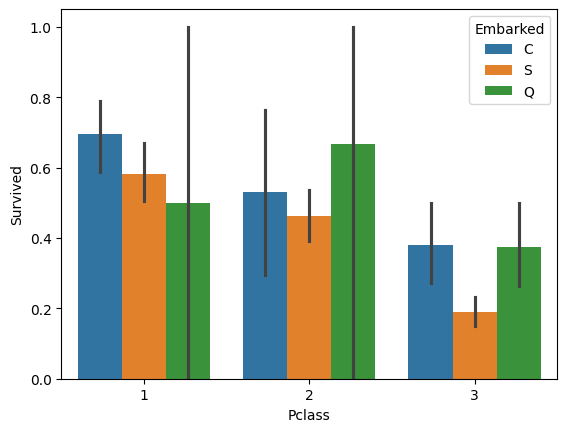

In [3]:
#Plot for training data set
train_dataset = pd.read_csv(train)
sns.barplot(x = "Pclass", y = "Survived", hue = "Embarked", data = train_dataset)
plt.show()

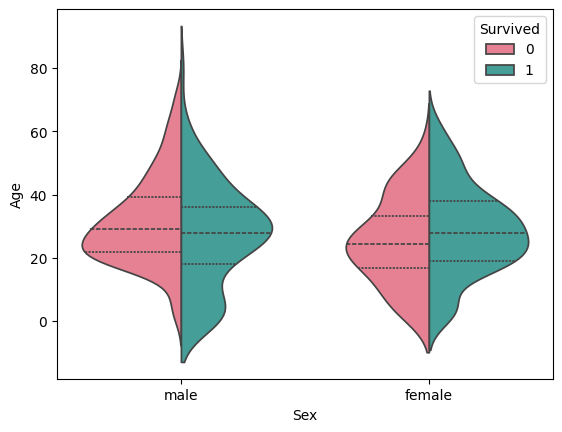

In [229]:
#Plot for training data set
train_dataset = pd.read_csv(train)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_dataset, split=True, palette="husl", inner="quartile")
plt.show()

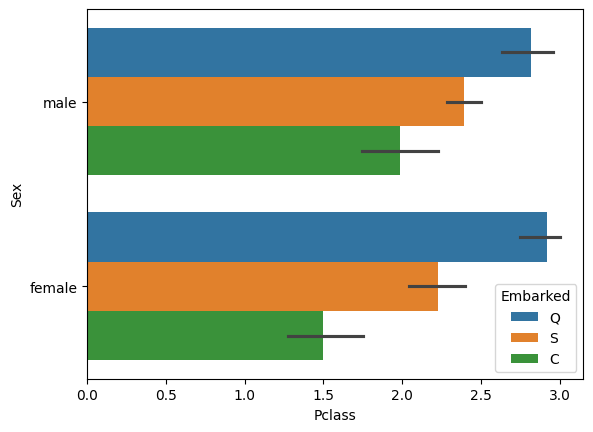

In [4]:
#plotting in Test data set
test_dataset = pd.read_csv(test)
sns.barplot(x = "Pclass", y = "Sex", hue = "Embarked", data = test_dataset)
plt.show()

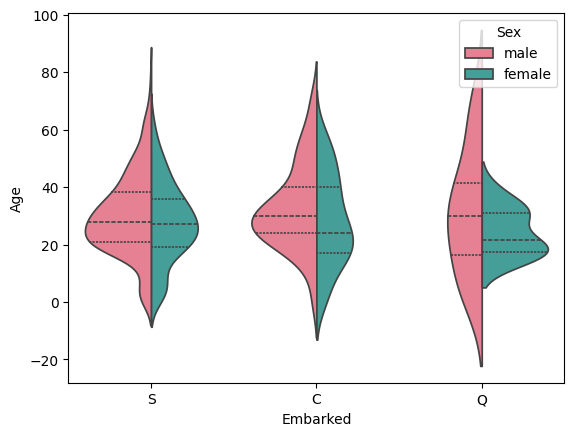

In [233]:
#Plot for training data set
test_dataset = pd.read_csv(train)
sns.violinplot(x="Embarked", y="Age", hue="Sex", data=test_dataset, split=True, palette="husl", inner="quartile")
plt.show()

### Part 3: Perform Simple Linear Regression on the SURVIVAL feature column

Through research, I encountered seaborn's regplot() and it satisfies the condition of simple regression. I also tried to learn about the pair plot so that I can give better visualization of multiple columns as shown below.

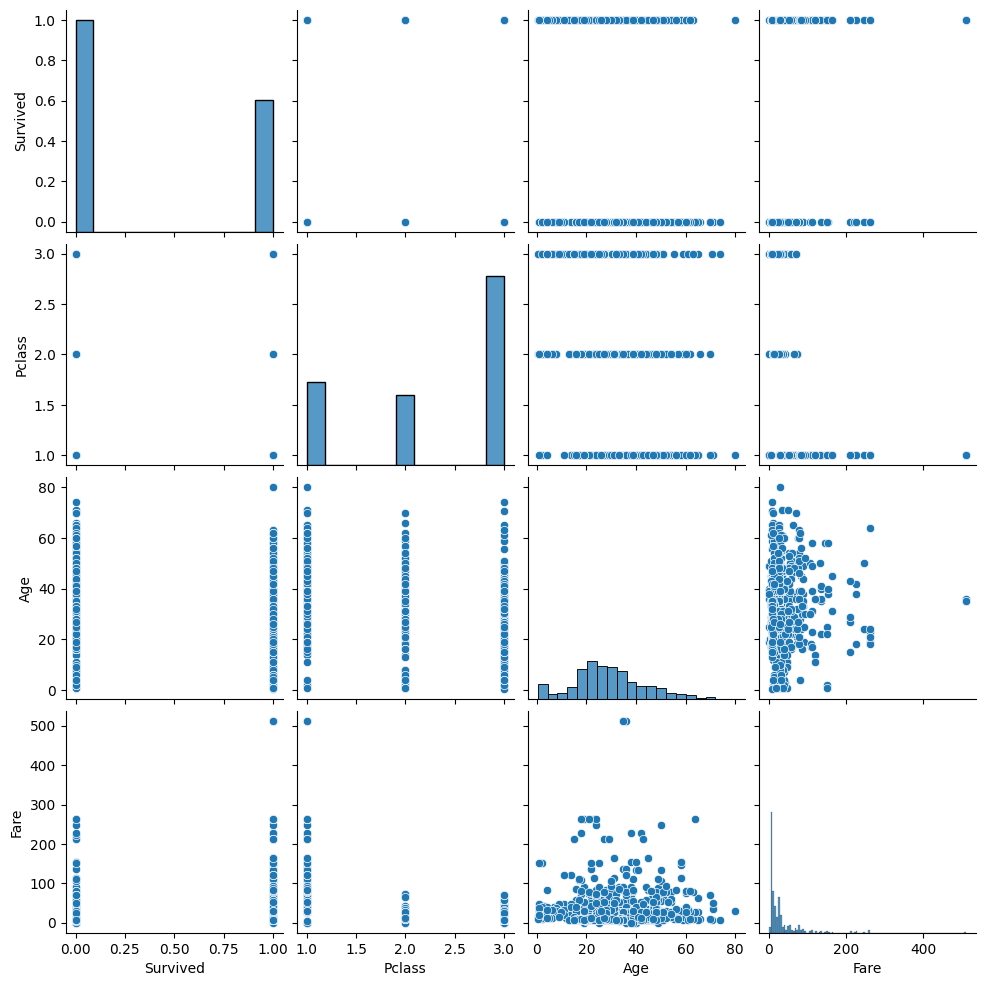

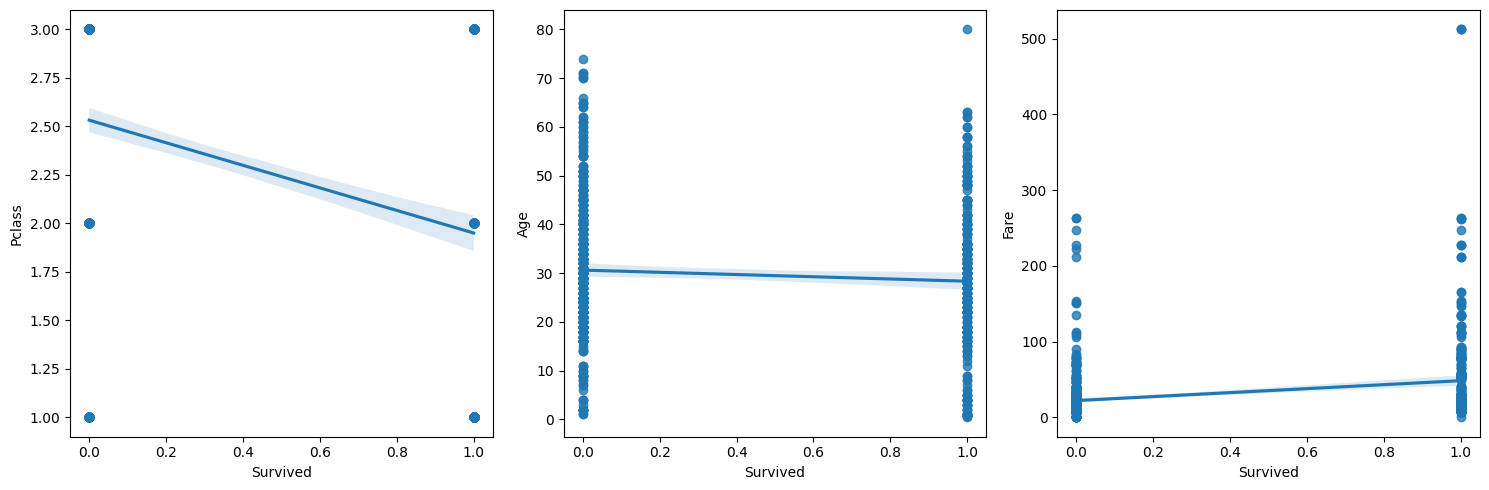

In [236]:
columns = ['Survived', 'Pclass', 'Age', 'Fare']
sns.pairplot(train_dataset[columns])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(x='Survived', y='Pclass', data=train_dataset, ax =axes[0])
sns.regplot(x='Survived', y='Age', data=train_dataset, ax= axes[1])
sns.regplot(x='Survived', y='Fare', data=train_dataset, ax= axes[2])

plt.tight_layout()
plt.show()



# Lab - Decision Tree Classification

## Part 1: Create a Decision Tree Classifier

<table style="undefined;table-layout: fixed; width: 953px">
<colgroup>
<col style="width: 194.2px">
<col style="width: 759.2px">
</colgroup>
  <tr>
    <th>Variable</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>1. PassengerID</td>
    <td>Unique identifier for each passenger</td>
  </tr>
  <tr>
    <td>2. Survival</td>
    <td>Did the passenger survive? (0 = No; 1 = Yes)</td>
  </tr>
  <tr>
    <td>3. Pclass</td>
    <td>Passenger ticket class. (1 = 1st; 2 = 2nd; 3 = 3rd)</td>
  </tr>
  <tr>
    <td>4. Name</td>
    <td>Name of the passenger. (last name, first name)</td>
  </tr>
  <tr>
    <td>5. Gender</td>
    <td>Male or female</td>
  </tr>
  <tr>
    <td>6. Age</td>
    <td>Age in years. Mostly integers with float values for children under one year.</td>
  </tr>
  <tr>
    <td>7. SibSp</td>
    <td>Number of siblings or spouse onboard.</td>
  </tr>
  <tr>
    <td>8. Parch</td>
    <td>Number of parents or children onboard.</td>
  </tr>
  <tr>
    <td>9. Ticket</td>
    <td>Ticket number</td>
  </tr>
  <tr>
    <td>10. Fare</td>
    <td>Amount paid for fare in pre-1970 British Pounds</td>
  </tr>
  <tr>
    <td>11. Cabin</td>
    <td>Cabin number</td>
  </tr>
  <tr>
    <td>12. Embarked</td>
    <td>Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</td>
  </tr>
</table>


With the data above, what kinds of questions can we ask about the factors that contributed to passengers
surviving or perishing in the Titanic disaster?

- Does the higher the ticket class the higher chance of survival?
- Does the gender and age of a passsenger has an effect on their priority for the safety rafts?
- Does the number of family of a person on board has a higher chance of survival?
- Does the cabin number has an effect on their survival?
- Does the port of embarkation of a passenger increases their chance of survival?

#### Step 1: Create the dataframe
##### a) Import  pandas and the csv file

In [56]:
#code cell 1
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("/content/titanic_train.csv")

##### b) Verify the import and take a look at the data.

In [57]:
#code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Are there missing values in the data set?
- yes, there are missing data entries on Age and cabin

In [58]:
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Step 2: Prepare the Data for the Decision Tree Model.

##### a) Replace string data with numeric labels

In [156]:
#code cell 4
training["Gender"] = training["Sex"].apply(lambda toLabel: 0 if toLabel=='male' else 1)

##### b) Verify that the Gender variable has been changed.

In [157]:
#code cell 5
#view the first few rows of the data again
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewGender,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


##### c) Address Missing Values in the Dataset


In [158]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

##### d) Verify that the values have been replaced.


In [159]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  NewGender    891 non-null    int64  
 13  Gender       891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


What is the value that was used to replace the missing ages?
- The value that was used to replace the missing is the mean of the ages as shown in the paramter of filna() function. which is 29.699118 as shown in the code below

In [160]:
training[["Age"]].mean(axis=0)

Age    29.699118
dtype: float64

#### Step 3: Train and Score the Decision Tree Model.

##### a) Create an array object with the variable that will be the target for the model.


In [161]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

##### b) Create an array of the values that will be the input for the model.

In [163]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

##### c) Create the learned model.

In [164]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

##### d) Evaluate the model

In [165]:
#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894

#### Step 6: Visualize the Tree
##### a) Create the intermediate file output
`sklearn.externals.six StringIO` se utiliza para generar las características del árbol de decisiones en un archivo.

In [166]:
#code cell 12
from six import StringIO
with open("./titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

##### b) Install Graphviz


##### c) Convert the intermediate file to a graphic


In [167]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng ./titanic.dot -o ./titanic.png

##### d) Display the image

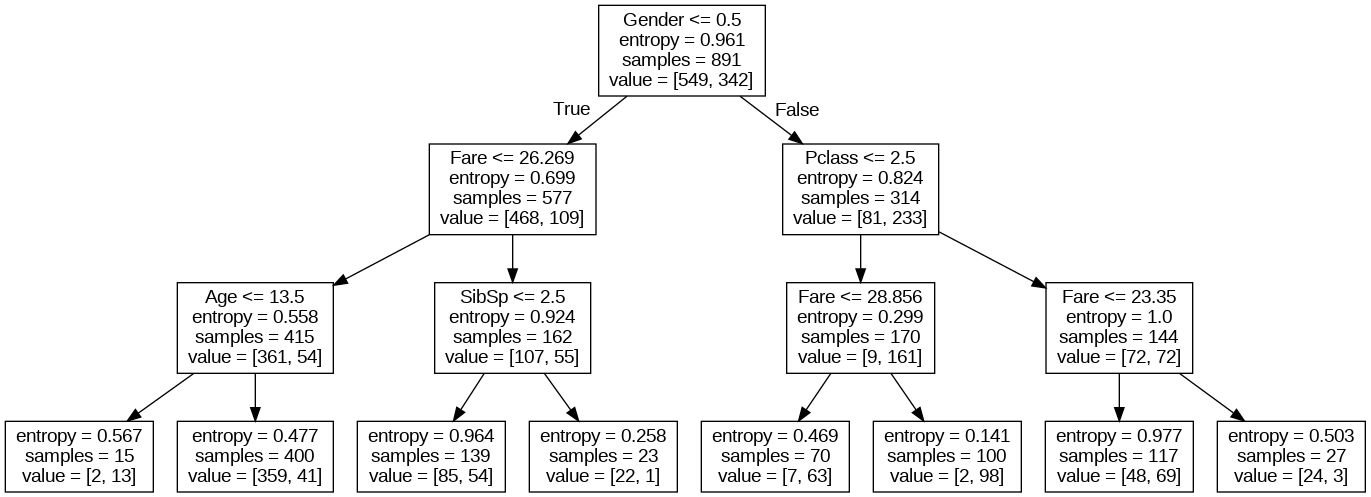

In [168]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("./titanic.png")

##### e) Interpret the tree
From the tree, we can see several things. First, at the root of the tree is the Gender variable, indicating that it is
the single most important factor in making the classification. The branches to the left are for Gender = 0 or male.
Each root and intermediate node contains the decision factor, the entropy, and the number of passengers who fit
the critierion at that point in the tree. For example, the root node indicates that there are 891 observations that
make up the learning data set. At the next level, we can see that 577 people were male, and 314 were female. In
the third level, at the far right, we can see that 415 people were male and paid a fare of less than 26.2686.
Finally, the leaf nodes for that intermediate node indicate that 15 of these passengers were below the age of
13.5, and the other 400 were older than that age.
Finally, the elements in the value array indicate survival. The first value is the number of people who died, and
the second is the number of survivors for each criterion. The root node tells us that out of our sample, 549
people died and 342 survived.
Entropy is a measure of noise in the decision. Noise can be viewed as uncertainty. For example, in nodes in
which the decision results in equal values in the survival value array, the entropy is at its highest possible value,
which is 1.0. This means that the model was unable to definitively make the classification decision based on the
input variables. For values of very low entropy, the decision was much more clear cut, and the difference in the
number of survivors and victims is much higher.

**What describes the group that had the most deaths by number? Which group had the most survivors?**

-  The group with the highest amount of death is Male who paid more than 26.269 for their fare ticket and are aged greater than 13.5.
<br>

Which important variables(s) are missing values and how many are missing?
- the missing values in the data are the age as shown in the original data set, ther are only 714 data inputs for the age. It lacks 105 data points which affected the results as shown in the tree.

## Part 2: Apply the Decision Tree Model

#### Step 1: Import and Prepare the Data

##### a) Import the data.

In [169]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("/content/titanic_test.csv")

In [170]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


How many records are in the data set?
- there are 418 records in the data set

<br>

Which important variables(s) are missing values and how many are missing?
- The missing important variables are from age 86 missing entries, and one on fare. There are also missing variables in the Cabin number with only 81 entries resulting to a lot of data entries missing. The number of missing data from the cabin is too much thus dropping it would be the best choice instead of assuming that may result to bias

##### b) Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 for female..

In [171]:
#code cell 16
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

##### c) Replace the missing age values with the mean of the ages.

In [172]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age"
#to replace missing values with the mean of the age values.
testing.drop(columns=['Cabin'], inplace=True)
testing["Age"].fillna(testing["Age"].mean(), inplace=True)
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)


##### d) Verify that the values have been replaced.

In [173]:
#code cell 18
#verify the data preparation steps. Enter and run both the info and head
#methods from here, by entering and running one and then the other.
testing.info()
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Gender       418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


#### Step 2: Label the testing dataset


##### a) Create the array of input variables from the testing data set.

In [174]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

##### b) Apply the model to the testing data set.


In [175]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set
target_labels.head()

,Est_Survival,Name
0,0,"Kelly, Mr. James"
1,1,"Wilkes, Mrs. James (Ellen Needs)"
2,0,"Myles, Mr. Thomas Francis"
3,0,"Wirz, Mr. Albert"
4,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


##### c) Evaluate the accuracy of the estimated labels



In [176]:
#code cell 21
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result
print(acc)


0.7682619647355163


## Part 3: Evaluate the Decision Tree Model

##### Step 1: Import the data

In [181]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("./titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


How many records are in the data set?
- There are 1308 entries

<br>

Which important variables(s) are missing values and how many are missing?
- Age is missing with 263 missing data


#### Step 2: Prepare the data.
##### a) Remove the "male" and "female" strings and replace them with 0 and 1 respectively.

In [182]:
#code cell 23
#replace the Gender labels in the testing dataframe
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

##### c) Replace the missing age values with the mean of the age of all members of the data set.

In [183]:
#code cell 24
#replace missing Age values with the mean age
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)
#display the first few rows of the data set
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


#### Step 2: Create the input and output variables for the training and testing data.


 ##### a) Designate the input variables and output variables and generate the arrays.

In [184]:
#code cell 25

#Import train_test_split() from the sklearn.model_selection libary
import numpy as np
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

##### b) Train the model and fit it to the testing data.

In [185]:
#code cell 26

#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

##### c) Compare models by scoring each.

In [186]:
#code cell 27


#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


# Part 4 For Further Study (optional)

1. Remove observations with missing Age values.

Using a mean to replace missing age values may affect the accuracy of the model. One approach to this might
be to remove all observations with missing age values. Although this will decrease the size of the training
dataset, it could improve accuracy.

### Loading of Data

In [187]:
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("./titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


### Pre Processing of data

In [188]:
#replace the Gender labels in the testing dataframe
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [189]:
#REMOVING missing Age values with the mean age
all_data = all_data.dropna()
#display the first few rows of the data set
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [190]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1045 non-null   int64  
 1   Pclass    1045 non-null   int64  
 2   Gender    1045 non-null   int64  
 3   Age       1045 non-null   float64
 4   SibSp     1045 non-null   int64  
 5   Fare      1045 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 57.1 KB


### Model Creation

In [191]:
#Import train_test_split() from the sklearn.model_selection libary
import numpy as np
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [192]:
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [193]:

#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8165869218500797 Testing score = 0.8086124401913876


The previous model has Testing score = 0.8053435114503816. After removing the rows with missing values, Model 2 resulted to Testing score = 0.8086124401913876
This means that the model 2 perfromed BETTER than the previous model as it does well on unseen data.

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>
